<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


mat_content = sio.loadmat('face.mat')
1
# mat_content # Let's see the content... 


1

In [0]:
face_data = mat_content['X']
face_labels = mat_content['l']

#transpose to select test and training data
face_data = face_data
face_labels = face_labels

In [0]:
#20/80 test/training split
data_train, data_test, label_train, label_test = train_test_split(
    face_data.T, face_labels.T, test_size=0.2)

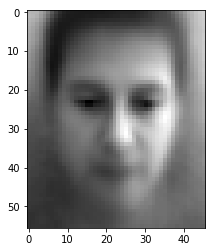

In [0]:
#compute average face vector
avg = np.mean(data_train, axis = 0)
plt.imshow(np.reshape(avg,(46,56)).T, cmap = 'gist_gray')

In [0]:
#subtract the mean face 
A = np.array([(data_train[0] - avg),(data_train[1] - avg)])

for i in range(2,len(data_train)):
    app = np.array([data_train[i] - avg])
    newA = np.append(A, app, axis = 0)
    A = newA
A = A.T

In [0]:
#compute covariance matrix 
S = np.dot(A, A.T)*1/len(data_train)

#Low-dimensional computation of eigenspace 
S2 = np.dot(A.T, A)*1/len(data_train)

In [0]:
# eigenvectors and eigenvalues
eigvals, eigvecs = np.linalg.eig(S)
eigvalsLow, eigvecsLow = np.linalg.eig(S2)
print(np.linalg.eig(S2))
# print(eigvalsLow, eigvecsLow)

KeyboardInterrupt: ignored

In [0]:
#represent each normalized face by its projections
W = np.dot(A, eigvecsLow)
# print(np.sort(eigvalsLow)[::-1])
from scipy.linalg import eigh
N=S2.shape[0]
print(N)
M = 5
Meigvals, Meigvecs= eigh(S2, eigvals=(N-M, N-1))
print(Meigvals)



416
[206274.33298912 267649.94671399 430914.21731701 557300.02045236
 914230.72747506]


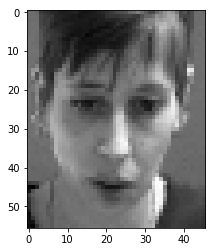

In [0]:
#reconstruction test face 
face_100 = face_data[:,100]
face_100 = np.reshape(face_100,(46,56))
plt.imshow(face_100.T, cmap= 'gist_gray')

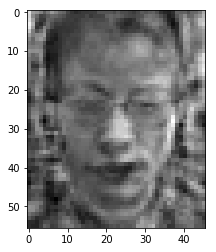

In [0]:
#reconstruct 
new_100 = avg + W[:,100]
new_100 = np.reshape(new_100,(46,56))
plt.imshow(new_100.T, cmap = 'gist_gray')

In [0]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
  
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

print(get_neighbors(data_train, label_train, data_test[100], 1, distance=distance))

[(array([ 22,  48,  31, ...,  55, 126, 114], dtype=uint8), 7570.728564675926, array([4], dtype=uint8))]


In [0]:
# test